In [1]:
import sys
sys.path.append('../../../../../')
from plot_tools.fig_preamble import * # imports numpy, matplotlib, Py2PDF, plot_helper_funcs, plot_figstyle_sheet

/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:
/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1182: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markeredgecolor != ec:


#### Paths ####

In [2]:
ver=0
datapath = '../../../../DATA_v'+str(ver)+'_/' #v'+str(ver)+'/DATA_v'+str(ver)+'/'
savefig = '../svg/paper_v0_'
figdata = '../svg/fig_data/paper_v0_'
figname = 'LKFFB_v_AKF'

#### Figure: Perfect v. Imperfect Learning ####

In [3]:
## Data
test_case_list = [27, 19]
variation_list = [5, 5]
undersampl_scale_on =0
sig_scale_on=0

LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
I am in RISK DICT and test case and variations are: 27 5
Got here too
Total coeff 8.88934261852 0.00358368674437
LKFFB
I am in RISK DICT and test case and variations are: 27 5


../../../../../data_tools/data_tuned_run_analysis.py:281: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (freq_basis_array == None) and (instantA == None):


LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 27 5
(27, 5)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
I am in RISK DICT and test case and variations are: 19 5
Got here too
Total coeff 651.779417919 0.00014780310704
LKFFB
I am in RISK DICT and test case and variations are: 19 5
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 5
(19, 5)


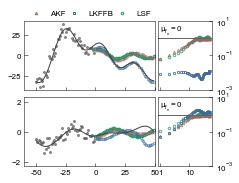

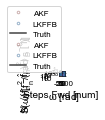

In [4]:
## Fig Setup
nrows = 2
ncols = 2

gs = gridspec.GridSpec(2, 20,
                       left=0.10, right=0.87, 
                       top=0.92, bottom=0.1, 
                       wspace=0.5, hspace=0.11)

# gs = gridspec.GridSpec(2, 2,
#                        left=0.15, right=0.985, 
#                        top=0.9, bottom=0.1, 
#                        wspace=0.1, hspace=0.2)

fig = plt.figure(figsize=(cm2inch(8.6),cm2inch(6.25)))

dumpfig = plt.figure(figsize=(0.1, 0.1))
dumpax = dumpfig.add_subplot(121)
dumpax2 = dumpfig.add_subplot(122)


for idx_c in xrange(len(test_case_list)):
    
    vars()['ax'+str(idx_c)+'_1']  = fig.add_subplot(gs[idx_c, 0:14])
    vars()['ax'+str(idx_c)+'_2']  = fig.add_subplot(gs[idx_c, 14:])
    
    # Single Predictions
    
    if test_case_list[idx_c] ==19:
        sig_scale_on = 1.
        undersampl_scale_on = 1.
    
    fig_data_name = figdata+figname+'_tc_'+str(test_case_list[idx_c])+'_v_'+str(variation_list[idx_c])
    
    vars()['ax'+str(idx_c)+'_1'], dumpax2 = psp(vars()['ax'+str(idx_c)+'_1'], dumpax2,  
                                                                     ['LSF', 'AKF', 'LKFFB'], 
                                                                    test_case_list[idx_c], variation_list[idx_c], 
                                                                    datapath, GPRP_load='No', ylim_amps = [-8, 0],
                                                                    fstep=50, sstep=50, lowloss=20, 
                                                                    save_data=fig_data_name,
                                                                    sig_scale_on=sig_scale_on, undersampl_scale_on=undersampl_scale_on)
    
    
    # N. Log(BR)
    
    dumpax, vars()['ax'+str(idx_c)+'_2'] = pnm(dumpax, vars()['ax'+str(idx_c)+'_2'],  ['LSF', 'AKF', 'LKFFB'], 
                                               test_case_list[idx_c], variation_list[idx_c], 
                                               datapath, save_data=fig_data_name,
                                               fstep=50, sstep=50, lowloss=20, 
                                               ylim = [-3, 1], yscale='log')
    vars()['ax'+str(idx_c)+'_2'].text(1, 2.5, r'$\mu_{f_n}=0$')
    vars()['ax'+str(idx_c)+'_2'].yaxis.tick_right()
    vars()['ax'+str(idx_c)+'_2'].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
    
    for count in [1, 2]:
        vars()['ax'+str(idx_c)+'_'+str(count)].set(ylabel='', xlabel='')
        vars()['ax'+str(idx_c)+'_'+str(count)].minorticks_off()
        
        
        if idx_c !=1:
            vars()['ax'+str(idx_c)+'_'+str(count)].set(xticklabels=[])

        
        vars()['ax'+str(idx_c)+'_'+str(count)] =  set_font_sizes(vars()['ax'+str(idx_c)+'_'+str(count)], fsize, Fsize)

        
vars()['ax'+str(0)+'_'+str(1)].legend(handles=PRED_H2[2:], labels=PRED_L2[2:],
                                      loc=3,  fontsize=fsize, frameon=False, bbox_to_anchor=(0., 1.02, 1., .102), 
                                      ncol=3, mode="expand", borderaxespad=0.)

fig.savefig(savefig+figname+'.svg', format='svg', dpi=my_dpi)
plt.show()
plt.close()

fig1 = plt.figure(figsize=(cm2inch(5),cm2inch(4)), dpi=my_dpi)

ax = fig1.add_subplot(111)
lgd=ax.legend(handles=PRED_H2,
       labels=PRED_L2,
       bbox_to_anchor=(-0.12, 0, 0.0,1.1), loc=2, ncol=3, frameon=True, fontsize=fsize, 
       facecolor='white', edgecolor='white')
ax.set_frame_on(False)
ax.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')

fig1.savefig(savefig+figname+'lgnd.svg', format='svg', dpi=my_dpi)
plt.show()
plt.close()

### 